#  Import Packages

In [13]:
from tvips_converter.converting_data.converting_tvips_to_nc_file import tvips_to_nc_converter
from tvips_converter.ploting_data.plot_com_shift import plot_com_shift
from tvips_converter.ploting_data.plot_4d_data_wo_saving import plot_4d_data_wo_saving
from tvips_converter.ploting_data.plot_4d_data_wo_saving_no_timestamps import plot_4d_data_wo_saving_no_timestamps
from tvips_converter.converting_data.make_4d_dataset_timestamps import make_4d_dataset_timestamps
from tvips_converter.correcting_data.remove_death_pixel import remove_death_pixel
from tvips_converter.ploting_data.make_virtuel_df import make_virtual_df
from tvips_converter.converting_data.export_images_for_phase_mapping import export_images_for_block_file
from tvips_converter.evaluating_data.cepstral_data import cepstral_stem
from tvips_converter.converting_data.blo_converter import bloFileWriter
import h5py
import numpy as np
# for marc3 use widget, for your personal pc use notebook
# %matplotlib widget 
%matplotlib ipympl

# Set file path 

In [2]:
# Your input required:
filepath = "/masc_shared/ag_volz/Samane/PED_SO014"
filename = "rec_20240613_164356_000"

# Do not change
filename_converted= filename[:-3]+'converted'

# Convert from .tvips to .nc data

In [3]:
# Your input required:

scan_size = (100,100) # (Points, Lines) 
scan_step_size = 1.5 # nm 
scan_rotation = 45 # degree
# camera_length = -1 # cm 
camera_length = 60 # cm 
ped_angle= 0.6 # degree
dwell_time = 500 # ms
number_of_packages = 1000
chunking = True 
chunk_size = None



# Do not change
tvips_converter = tvips_to_nc_converter()

tvips_converter.filepath = filepath
tvips_converter.filename = filename
tvips_converter.scan_size = scan_size
tvips_converter.scan_step_size = scan_step_size
tvips_converter.scan_rotation = scan_rotation
tvips_converter.camera_length = camera_length
tvips_converter.ped_angle = ped_angle
tvips_converter.dwell_time = dwell_time
tvips_converter.n_packages = number_of_packages
tvips_converter.chunking = chunking
tvips_converter.chunk_size = chunk_size

tvips_converter.convert_to_nc_file()

Found 1 files
total number of frames = 10019
rec_20240613_164356_000.tvips
File 1 of 1. Package 1 of 11
File 1 of 1. Package 2 of 11
File 1 of 1. Package 3 of 11
File 1 of 1. Package 4 of 11
File 1 of 1. Package 5 of 11
File 1 of 1. Package 6 of 11
File 1 of 1. Package 7 of 11
File 1 of 1. Package 8 of 11
File 1 of 1. Package 9 of 11
File 1 of 1. Package 10 of 11
File 1 of 1. Package 11 of 11
finished_loading
Time elapsed (hh:mm:ss.ms) 0:02:04.171244


# Plot com shift 

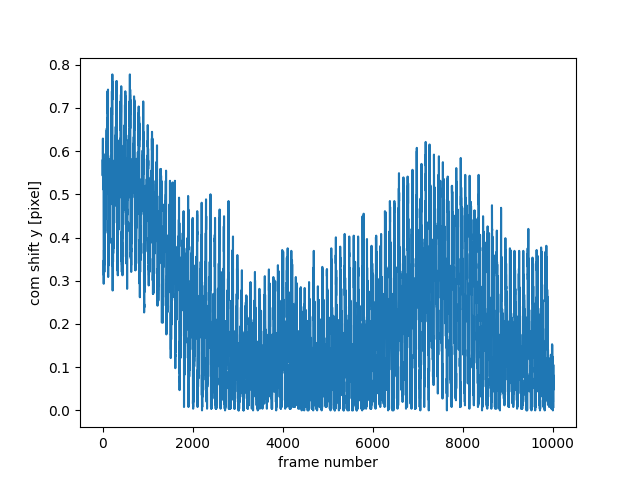

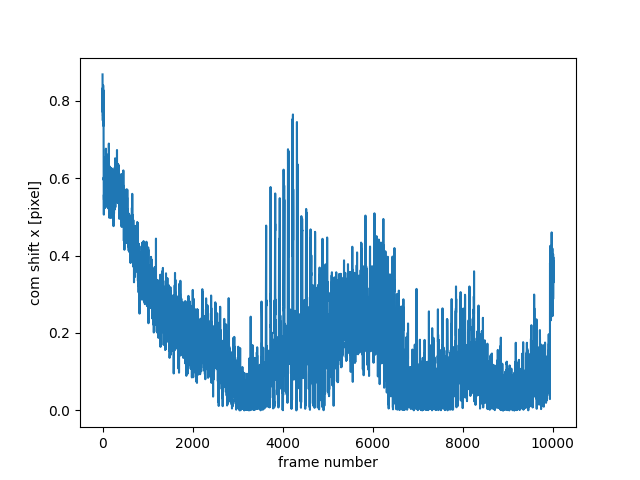

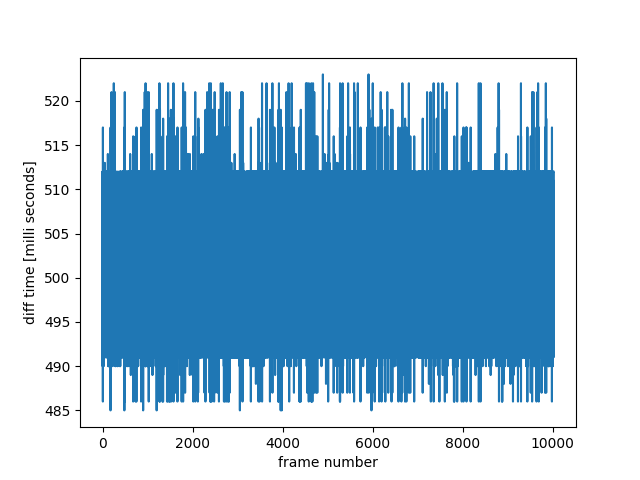

mean dwelltime 504.2103246758844 ms
given  dwelltime 500.0 ms


In [4]:
# Do not change
com_shift_plot = plot_com_shift()
com_shift_plot.filepath = filepath
com_shift_plot.filename = filename_converted
com_shift_plot.plot()

# Plot first drafts of vdf 

duration 5001.246000051498 s
start
23
stop
9941
Map scan points with timestamps
0
1
2
3
4
5
6
7
8
9
Number of missing frames =  81
Map frames in a 4d dataset
Package 1 of 10
Package 2 of 10
Package 3 of 10
Package 4 of 10
Package 5 of 10
Package 6 of 10
Package 7 of 10
Package 8 of 10
Package 9 of 10
Package 10 of 10


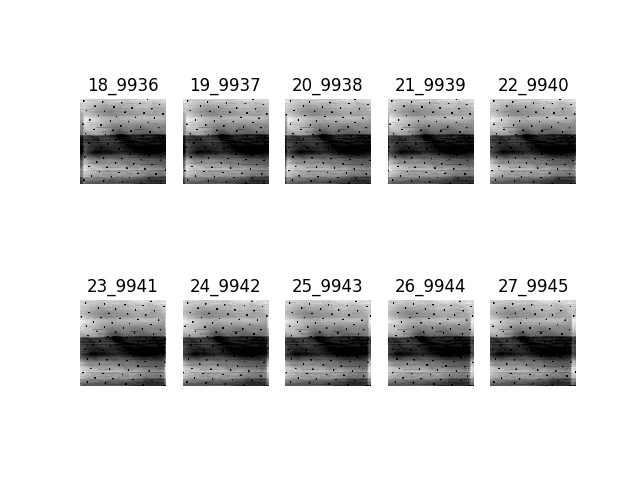

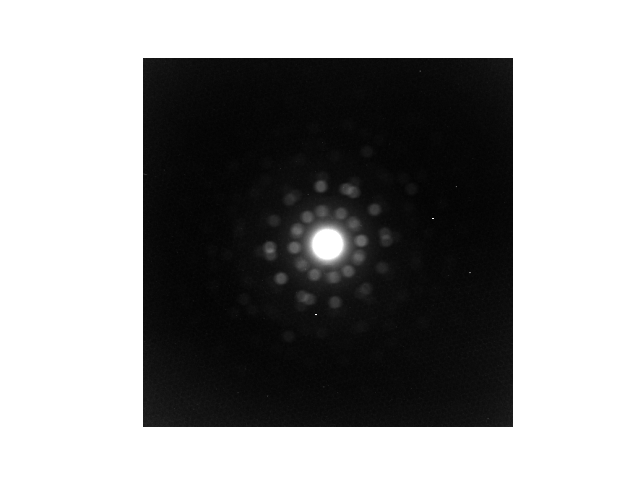

Finished


In [6]:
# This only produces several vdf images for fine tuning start and end frame. 
# There will be no 4D-Dataset saved in the nc file!

# Your input required:

start = 23#372 # frame number
stop = 9941#17010 # frame number
parts_per_package = 1000 # only if your data is to large reduce it

# Do not change
fly_back_time = 10 #ms
first_vdf_draft = plot_4d_data_wo_saving()
first_vdf_draft.filepath = filepath
first_vdf_draft.filename = filename_converted
first_vdf_draft.start = start 
first_vdf_draft.stop = stop
first_vdf_draft.parts_per_package = parts_per_package
first_vdf_draft.fly_back_time = fly_back_time
first_vdf_draft.filter_timestamps = False
first_vdf_draft.plot()

# Make final 4d dataset

Make Matrix for mapping frames in 4d
Map frames in 4d
Package 1 of 5
[-0.34079603  3.27892129]
Package 2 of 5
Package 3 of 5
Package 4 of 5
Package 5 of 5
1


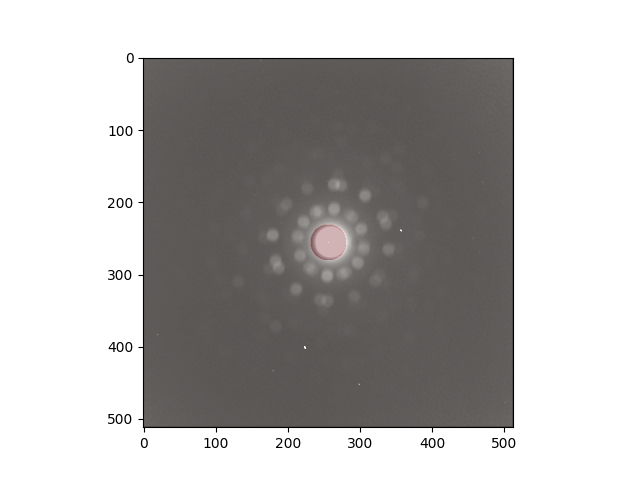

Finished
Remove dead pixel
Package 1 of 5
Package 2 of 5
Package 3 of 5
Package 4 of 5
Package 5 of 5
Finished
Time elapsed (hh:mm:ss.ms) 0:04:39.019130


In [8]:
from datetime import datetime
# This only produces several vdf images for fine tuning start and end frame. 
# There will be no 4D-Dataset saved in the nc file!

# Your input required:

start = 23# frame number 
stop = 9941 # frame number 
parts_per_package = 20 # only if your data is to large reduce it
fly_back_time = 10 #ms 
delete_dead_pixel = True # If you need it
correct_dscan = True # not suitable for com data!!!
dark_correction = False
median_quantile = 0.95
center_list =((256,256),) # List of aperure centers for vdf image ((x_1, y_1, (x_2,y_2), ...) 
inner_radius_list = (0,) # ist of aperure inner radiusage (radius_1, radius_2, ...)
outer_radius_list =  (25,) # List of aperure outer radius (radius_1, radius_2, ...) 
chunking = True 
chunk_size = None


# Do not change
start_time = datetime.now()
making_4d_dataset = make_4d_dataset_timestamps()

making_4d_dataset.parts_per_package = parts_per_package
making_4d_dataset.filepath = filepath
making_4d_dataset.filename = filename_converted
making_4d_dataset.start = start
making_4d_dataset.stop = stop
making_4d_dataset.fly_back_time = fly_back_time
making_4d_dataset.correct_dscan = correct_dscan
making_4d_dataset.center_list_com_mask = center_list
making_4d_dataset.inner_radius_list_com_mask = inner_radius_list
making_4d_dataset.outer_radius_list_com_mask = outer_radius_list
making_4d_dataset.dark_correction = dark_correction
making_4d_dataset.median_quantile = median_quantile
making_4d_dataset.chuking = chunking
making_4d_dataset.chunk_size = chunk_size

making_4d_dataset.make_4d_data()

if delete_dead_pixel:
    print('Remove dead pixel')

    removing_dead_pixel = remove_death_pixel()
    removing_dead_pixel.parts_per_package = parts_per_package
    removing_dead_pixel.filepath = filepath
    removing_dead_pixel.filename = filename_converted
    removing_dead_pixel.chuking = True #chunking
    removing_dead_pixel.chunk_size = chunk_size

    removing_dead_pixel.remove_dead_pixel()
    
    
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

# Delete dead Pixel afterwards if needed

In [1]:
from datetime import datetime
start_time = datetime.now()

chunking = True 
chunk_size = None


parts_per_package = 20
removing_dead_pixel = remove_death_pixel()
removing_dead_pixel.parts_per_package = parts_per_package
removing_dead_pixel.filepath = filepath
removing_dead_pixel.filename = filename_converted
removing_dead_pixel.chuking = chunking
removing_dead_pixel.chunk_size = chunk_size

removing_dead_pixel.remove_dead_pixel()

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

NameError: name 'remove_death_pixel' is not defined

# Plot Data 

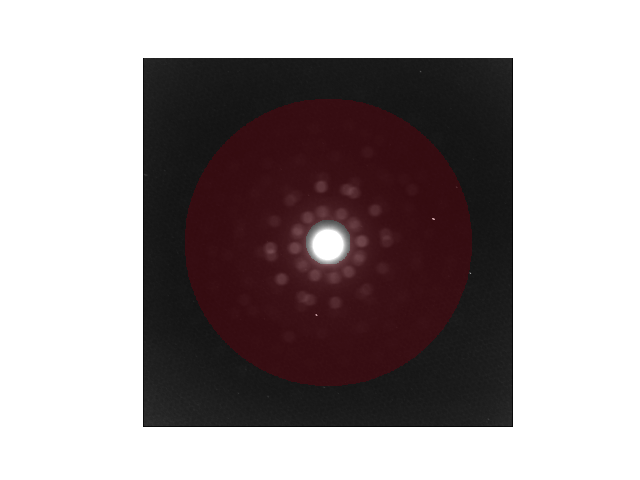

Package 1 of 2
Package 2 of 2
Remove dead pixel


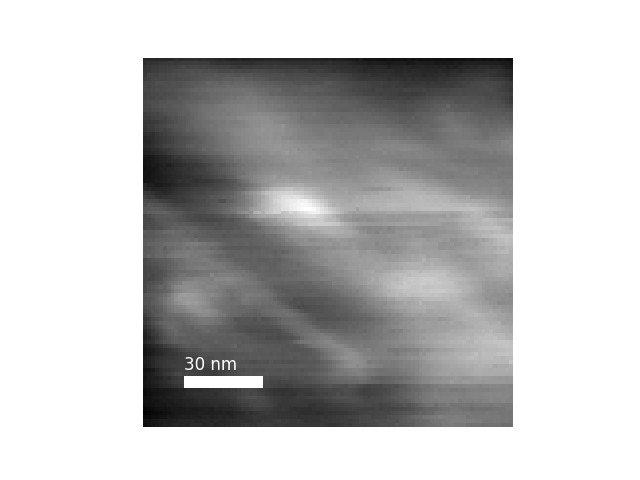

Step size  = 1.5 nm
Step size calibration  = 1.0
Time elapsed (hh:mm:ss.ms) 0:01:28.151084


In [10]:
from datetime import datetime
start_time = datetime.now()


# Your input required:
save = True# if you want to save the image
export_as_npy = False #if you want to save a numpy file from the image
edge_pixel = 3 # how many pixel at each side of the image are cutted of 
parts_per_package = 50 # only if your data is to large reduce it
center_list = ((256,256),) # List of aperure centers for vdf image ((x_1, y_1, (x_2,y_2), ...) 
inner_radius_list =  (30,) # ist of aperure inner radiusage (radius_1, radius_2, ...)
outer_radius_list =  (200,) # List of aperure outer radius (radius_1, radius_2, ...) 
quantil = 0.995 # Clip intensity with a max value that (1-quantil)*100% of Pixels are brighter than this max vale
dpi = 600
remove_dead_pixel = True 

nc_group = '/corrected_data/remove_dead_pixel' # without missing frames
# nc_group = '/converted_data' # with missing frames


# Do not change
virtual_df = make_virtual_df()

virtual_df.save = save
virtual_df.export_as_npy = export_as_npy
virtual_df.edge_pixel = edge_pixel 
virtual_df.parts_per_package = parts_per_package
virtual_df.center_list = center_list
virtual_df.inner_radius_list = inner_radius_list
virtual_df.outer_radius_list = outer_radius_list
virtual_df.quantil = quantil 
virtual_df.nc_group = nc_group 
virtual_df.filepath = filepath
virtual_df.filename = filename_converted
virtual_df.dpi = dpi
virtual_df.remove_dead_pixel = remove_dead_pixel

virtual_df.plot_mask()
virtual_df.plot_vdf()

virtual_df.close_nc_file()


time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

# Export dataset as block file 

In [12]:
# Your input required:
bin_factor = 1 # reduce image size to original_size/bin_factor

# Use only either clipping, or gamma or log for downscaling by setting only one to True

use_clipping = True 
quantil = 0.998 # Clip intensity with a max value that (1-quantil)*100% of Pixels are brighter than this max vale

use_gamma = False 
gamma = 5

use_log = True

#nc_group = '/converted_data'
nc_group = '/corrected_data/remove_dead_pixel'


# skipes every nth frame if > 1 
skip_frames = 1


# clip data in real space 
clip_data = False # don't work so far 
x_max = 115 
x_min = 8 
y_max = 125
y_min = 2 


# do not change 

block_converter = bloFileWriter(
    nc_file= filepath+'/'+filename_converted+'.nc',
    nc_group = nc_group,
    path_blo =  filepath+'/'+filename_converted+'_exported_clip.blo'

)

block_converter.bin_factor = bin_factor
block_converter.use_clipping = use_clipping
block_converter.use_gamma = use_gamma
block_converter.use_log = use_log
block_converter.gamma = gamma
block_converter.quantil = quantil
block_converter.skip_frames = skip_frames
block_converter.clip_data = clip_data
block_converter.x_max = x_max 
block_converter.x_min = x_min 
block_converter.y_max = y_max
block_converter.y_min = y_min 


block_converter.run()

Make VBF
Package 1 of 10
Package 2 of 10
Package 3 of 10
Package 4 of 10
Package 5 of 10
Package 6 of 10
Package 7 of 10
Package 8 of 10
Package 9 of 10
Package 10 of 10
Make block file
diff scale: [80.6]
line 1 of 100
line 2 of 100
line 3 of 100
line 4 of 100
line 5 of 100
line 6 of 100
line 7 of 100
line 8 of 100
line 9 of 100
line 10 of 100
line 11 of 100
line 12 of 100
line 13 of 100
line 14 of 100
line 15 of 100
line 16 of 100
line 17 of 100
line 18 of 100
line 19 of 100
line 20 of 100
line 21 of 100
line 22 of 100
line 23 of 100
line 24 of 100
line 25 of 100
line 26 of 100
line 27 of 100
line 28 of 100
line 29 of 100
line 30 of 100
line 31 of 100
line 32 of 100
line 33 of 100
line 34 of 100
line 35 of 100
line 36 of 100
line 37 of 100
line 38 of 100
line 39 of 100
line 40 of 100
line 41 of 100
line 42 of 100
line 43 of 100
line 44 of 100
line 45 of 100
line 46 of 100
line 47 of 100
line 48 of 100
line 49 of 100
line 50 of 100
line 51 of 100
line 52 of 100
line 53 of 100
line 54 o

# Cepstral STEM

In [11]:
cepstral_class = cepstral_stem()

cepstral_class.parts_per_package = 10
cepstral_class.nc_group = '/corrected_data/remove_dead_pixel'#'/converted_data'
cepstral_class.filepath = filepath
cepstral_class.filename = filename_converted
cepstral_class.normalise = True

cepstral_class.make_cepstral_data()

Package 1 of 10
Package 2 of 10
Package 3 of 10
Package 4 of 10
Package 5 of 10
Package 6 of 10
Package 7 of 10
Package 8 of 10
Package 9 of 10
Package 10 of 10
finish
